/tmp/ipykernel_235/3391227484.py:14: RuntimeWarning: invalid value encountered in true_divide
  return ((hb/(np.pi*c))*(omega/(np.e**(hb*omega/(k*temperature))-1)))


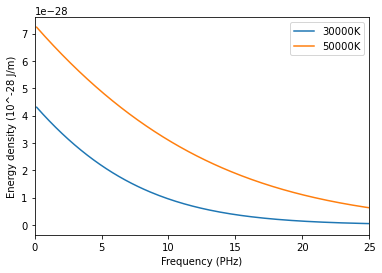

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
limit=1000
frequency_limit = np.linspace(0, 25, limit)
frequency = frequency_limit*10**15
hb=1.05459*10**(-34)
c=3*10**8
omega = frequency*2*np.pi
k= 1.38*10**(-23)
epsilon = 8.854*10**(-12)
tau = 2*limit*2*10**(-15)

def planck_formula(omega,temperature):
    return ((hb/(np.pi*c))*(omega/(np.e**(hb*omega/(k*temperature))-1)))
out_30000 = planck_formula(omega,30000)
out_50000 = planck_formula(omega,50000)
plot_30000 = plt.plot(frequency_limit*2*np.pi,out_30000,label='30000K')
plot_50000 = plt.plot(frequency_limit*2*np.pi,out_50000,label='50000K')
plt.xlim(0,25)
plt.xlabel ('Frequency (PHz)')
plt.ylabel('Energy density (10^-28 J/m)')
plt.legend()
plt.show()

In [4]:
def planck_formula_n(omega,temperature):
    return ((6*hb**2/(np.pi*(temperature**2)*k**2))*(abs(omega)/(np.e**(hb*abs(omega)/(k*temperature))-1)))
def rms(temperature):
    return((((2/(epsilon*6*hb*c))**0.5)*k*temperature))
out_30000_n = planck_formula_n(omega,30000)
out_50000_n = planck_formula_n(omega,50000)
rms_30000 = rms(30000)
rms_50000 = rms(50000)
print(rms_30000,rms_50000)

0.4516141108328581 0.7526901847214301


/tmp/ipykernel_235/3127680436.py:2: RuntimeWarning: invalid value encountered in true_divide
  return ((6*hb**2/(np.pi*(temperature**2)*k**2))*(abs(omega)/(np.e**(hb*abs(omega)/(k*temperature))-1)))


/tmp/ipykernel_235/853576440.py:2: RuntimeWarning: overflow encountered in power
  x=abs(omega)/(np.e**(abs(omega)/temperature)-1)
/tmp/ipykernel_235/853576440.py:2: RuntimeWarning: invalid value encountered in true_divide
  x=abs(omega)/(np.e**(abs(omega)/temperature)-1)


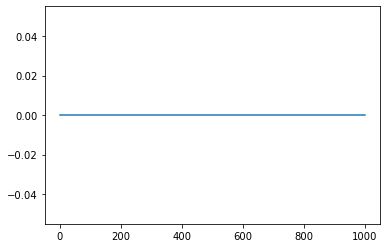

In [11]:
def mode(omega,temperature):
    x=abs(omega)/(np.e**(abs(omega)/temperature)-1)
    return x
x = mode(omega,30000)
plt.plot(x)

In [9]:
Ml = np.random.normal(0,1,limit)
Nl = np.random.normal(0,1,limit)

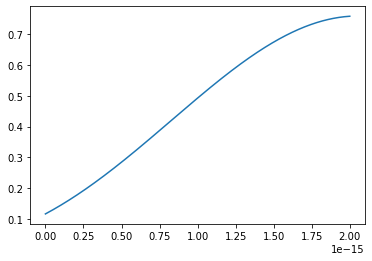

In [10]:
def Es(delta,tau,temperature,Ml,Nl,tj):
    def sigma(x):
        return (Ml[x]+1j*Nl[x])*planck_formula_n(2*np.pi*x/tau,30000)**0.5*np.e**(1j*2*np.pi*x*tj/tau)
    sum = 0
    for i in range(1,limit-1):
            sum += sigma(i)
    return(delta*sum*2/tau**0.5)
time_limit = np.linspace(0, 2*10**(-15), limit)
Es = Es(rms_30000,tau,30000,Ml,Nl,time_limit)
plt.plot(time_limit,Es)